Rapport du TP4 AI52 A23 : Thibault Chausson

# Algorithme classique du problème du sac à dos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as t

# Les 5 jeux de données

In [2]:
import random

# Création d'un tableau de 10 nombres aléatoires entre 10 et 200
array = [random.randint(10, 50) for _ in range(50)]
print(array)

[43, 24, 43, 30, 12, 22, 42, 20, 50, 47, 15, 14, 35, 24, 42, 32, 36, 39, 38, 37, 38, 39, 47, 25, 29, 23, 23, 33, 45, 18, 15, 26, 35, 28, 48, 34, 48, 32, 27, 22, 27, 50, 48, 35, 26, 28, 28, 28, 40, 47]


# Jeu de données 1

Pour 5 valeurs et 5 poids.

In [3]:
weights_1 = np.array([39, 36, 36, 21, 29])
values_1 = np.array([162, 212, 181, 199, 159])
max_weight_1 = np.sum(weights_1) // 3

## Jeu de données 2

Pour 10 valeurs et 10 poids.

In [4]:
weights_2 = np.array([21, 44, 45, 38, 22, 28, 40, 22, 33, 13])
values_2 = np.array([169, 256, 104, 273, 287, 219, 226, 216, 143, 134])
max_weight_2 = np.sum(weights_2) // 3

## Jeu de données 3

Pour 15 valeurs et 15 poids.

In [5]:
weights_3 = np.array([26, 29, 37, 15, 32, 13, 49, 17, 47, 28, 30, 48, 25, 16, 26])
values_3 = np.array([191, 117, 135, 249, 178, 214, 283, 257, 161, 262, 156, 157, 204, 285, 134])
max_weight_3 = np.sum(weights_3) // 3

## Jeu de données 4

Pour 20 valeurs et 20 poids.

In [6]:
weights_4 = np.array([24, 28, 27, 13, 49, 32, 40, 50, 25, 44, 20, 29, 17, 11, 23, 48, 38, 32, 31, 46])
values_4 = np.array([229, 116, 154, 215, 287, 272, 274, 254, 136, 143, 227, 243, 264, 258, 188, 150, 237, 135, 146, 184])
max_weight_4 = np.sum(weights_4) // 3

## Jeu de données 5

Pour 50 valeurs et 50 poids.

In [7]:
weights_5 = np.array([22, 35, 36, 37, 50, 31, 22, 48, 42, 29, 14, 48, 20, 17, 27, 25, 38, 20, 15, 39, 28, 42, 45, 44, 18, 37, 44,
             10, 32, 43, 21, 33, 47, 34, 48, 13, 39, 24, 40, 42, 45, 22, 35, 43, 43, 11, 42, 20, 16, 33])
values_5 = np.array([191, 153, 245, 217, 173, 258, 127, 173, 276, 161, 102, 240, 146, 205, 135, 154, 197, 144, 219, 260, 296,
            297, 126, 165, 192, 270, 152, 262, 209, 174, 156, 224, 107, 149, 118, 249, 218, 232, 172, 153, 168, 228,
            156, 266, 229, 202, 115, 210, 152, 158])
max_weight_5 = np.sum(weights_5) // 3

# Classique

In [8]:
def correction_un(arg_population, arg_max_weight, arg_weights):
    # On corrige un individu
    S2 = np.sum(arg_population * arg_weights)
    if S2 > arg_max_weight:
        # On cherche l'indice du premier 1
        indice = np.where(arg_population == 1)[0][0]
        # On le remplace par un 0
        arg_population[indice] = 0
    return arg_population


def correction(arg_population, arg_max_weight, arg_weights):
    # On corrige la population
    for i in range(arg_population.shape[0]):
        arg_population[i] = correction_un(arg_population[i], arg_max_weight, arg_weights)
    return arg_population

In [9]:
def fitness_un(arg_weight, arg_value, arg_population, arg_max_weight):
    # On calcule la fitness d'un individu
    S1 = np.sum(arg_population * arg_value)
    S2 = np.sum(arg_population * arg_weight)
    if S2 > arg_max_weight:
        return 0
    else:
        return S1


def fitness(arg_weight, arg_value, arg_population, arg_max_weight):
    # On calcule la fitness de la population
    arg_fitness = np.empty(arg_population.shape[0])
    for i in range(arg_population.shape[0]):
        arg_fitness[i] = fitness_un(arg_weight, arg_value, arg_population[i], arg_max_weight)
    return arg_fitness

In [10]:
def selection_roulette(arg_fitness, arg_population):
    # Selectionner par la roulette les 2 meilleurs individus, ils doivent être différents
    parents = []
    fitness_aux = arg_fitness
    for i in range(2):
        somme = np.sum(fitness_aux)
        fitness_roulette = fitness_aux / somme
        tirage = np.random.rand()
        # On cherche l'indice de l'individu qui correspond au tirage et on le stocke dans parents puis on le supprime de la population
        somme = 0
        for j in range(fitness_roulette.shape[0]):
            somme += fitness_roulette[j]
            if somme >= tirage:
                parents.append(arg_population[j])
                arg_population = np.delete(arg_population, j, axis=0)
                arg_fitness = np.delete(arg_fitness, j, axis=0)
                fitness_aux = np.delete(fitness_roulette, j, axis=0)
                break
    return parents


In [11]:
def crossover(parents, arg_max_weight, arg_weights):
    # On choisit un point de croisement aléatoire
    point_croisement = np.random.randint(1, parents[0].shape[0] - 1)
    # On crée les enfants
    enfant1 = np.concatenate((parents[0][:point_croisement], parents[1][point_croisement:]))
    enfant2 = np.concatenate((parents[1][:point_croisement], parents[0][point_croisement:]))
    # On corrige les enfants
    return correction_un(enfant1, arg_max_weight, arg_weights), correction_un(enfant2, arg_max_weight, arg_weights)

In [12]:
def mutation(enfants, arg_max_weight, arg_weights):
    # On choisit un point de mutation aléatoire
    point_mutation = np.random.randint(0, enfants[0].shape[0])
    # On crée les enfants si le point de mutation est 0 on le change en 1 et inversement
    if enfants[0][point_mutation] == 0:
        enfants[0][point_mutation] = 1
    else:
        enfants[0][point_mutation] = 0
    # On corrige l'enfant
    return correction_un(enfants[0], arg_max_weight, arg_weights), correction_un(enfants[1], arg_max_weight,
                                                                                 arg_weights)

In [13]:
def evolution(arg_population, arg_fitness, arg_max_weight, arg_weights, arg_values, arg_mutation_rate=0.1):
    # On sélectionne les parents
    parents = selection_roulette(arg_fitness, arg_population)
    # On crée les enfants
    enfants = crossover(parents, arg_max_weight, arg_weights)
    # On mute les enfants avec une probabilité
    if np.random.rand() < arg_mutation_rate:
        enfants = mutation(enfants, arg_max_weight, arg_weights)
    # On ajoute les enfants à la population s'ils améliorent le pire individu
    enfants = np.array(enfants)
    fitness_enfants = fitness(arg_weights, arg_values, enfants, arg_max_weight)
    for i in range(2):
        if fitness_enfants[i] > np.min(arg_fitness):
            # On remplace le pire individu par l'enfant
            arg_population[np.argmin(arg_fitness)] = enfants[i]
            arg_fitness[np.argmin(arg_fitness)] = fitness_enfants[i]
    # On calcule la fitness de la nouvelle population
    return arg_population

In [14]:
def algo_genetique(arg_population, arg_weights, arg_values, arg_max_weight, nb_iterations=1000, seuil_amelioration=0.01,
                   patience=100):
    historique_fitness = []  # Stocker l'historique des fitness maximales
    compteur_sans_amelioration = 0  # Compteur pour les itérations sans amélioration significative

    for _ in range(nb_iterations):
        arg_fitness = fitness(arg_weights, arg_values, arg_population, arg_max_weight)
        fitness_max = np.max(arg_fitness)

        # Mise à jour de l'historique et vérification du critère d'arrêt
        if historique_fitness:
            if fitness_max - historique_fitness[-1] < seuil_amelioration:
                compteur_sans_amelioration += 1
            else:
                compteur_sans_amelioration = 0

        historique_fitness.append(fitness_max)

        if compteur_sans_amelioration >= patience:
            print(f"Arrêt après {_} itérations, car il n'y a pas eu d'amélioration significative.")
            break

        arg_population = evolution(arg_population, arg_fitness, arg_max_weight, arg_weights, arg_values)

    # On récupère le meilleur individu après le dernier cycle
    arg_fitness = fitness(arg_weights, arg_values, arg_population, arg_max_weight)
    return arg_population[np.argmax(arg_fitness)], np.max(arg_fitness), historique_fitness


Pour cet algorithme génétique, j'ai décidé d'utiliser les méthodes suivantes :
- correction des individues
- Sélection par la roulette
- Croisement à un point avec un point de croisement aléatoire
- Mutation avec une probabilité, elle consiste à changer un bit aléatoire de l'individu

J'aurais pu utiliser d'autres méthodes comme la sélection par tournoi, le croisement à deux points, la mutation avec une probabilité différente pour chaque bit, etc.

De plus, j'ai décidé d'implémenter simplement l'algorithme, sans trier la population initiale en fonction des fitness décroissante et faire des ajouts dichotomiques pour les enfants. Certes cela aurait pu améliorer l'algorithme, mais cela aurait aussi complexifié le code et le gain pour les tailles des populations aurait été minime.

# Quantique 

In [15]:
import numpy as np


def initialiser_q(n, m):
    # Créer la matrice Q avec la valeur 1 / racine(2)
    un_ele = np.full(m, 1 / (2 ** 0.5))
    return np.array([[un_ele, un_ele] for _ in range(n)])


def initialiser_p(n, m, Q):
    # Créer la matrice P avec des valeurs entre 0 et 1 en fonction de Q
    fct_r = np.random.rand(n, m)
    return (fct_r >= (Q[:, 0] ** 2)).astype(int)


def evaluer_fitness(P, arg_weights, arg_values, arg_max_weight):
    S1 = np.dot(P, arg_values)
    S2 = np.dot(P, arg_weights)
    return np.where(S2 > arg_max_weight, 0, S1)


def recuperer_meilleur(P, arg_fitness):
    idx_max = np.argmax(arg_fitness)
    return P[idx_max], arg_fitness[idx_max]


def def_gamma(fitness_indi, fitness_max, bit_indi, bit_max):
    # formalisation de la condition de gamma sous forme de tableau
    conditions = [(bit_indi == 0) & (bit_max == 0),
                  (bit_indi == 0) & (bit_max == 1) & (fitness_indi > fitness_max),
                  (bit_indi == 1) & (bit_max == 0) & (fitness_indi > fitness_max),
                  (bit_indi == 1) & (bit_max == 1) & (fitness_indi > fitness_max)]
    choices = [0, 0.05 * np.pi, 0.025 * np.pi, 0.025 * np.pi]
    return np.select(conditions, choices, default=0.01 * np.pi)


def calcule_alpha_beta(alpha, beta, gamma):
    # Calcul de alpha_prime et beta_prime en fonction de la matrice de rotation U(gamma)
    alpha_prime = alpha * np.cos(gamma) - beta * np.sin(gamma)
    beta_prime = alpha * np.sin(gamma) + beta * np.cos(gamma)
    return alpha_prime, beta_prime

def get_best(B):
    return max(B, key=lambda x: x[1])

Commencer les itérations suivantes jusqu’à la satisfaction d’un critère d’arrêt :
- Mettre à jour de $Q(t)$ par des portes de rotation : Dans l'AGO, les chromosomes quantiques doivent être mis à jour de génération en génération afin d'évoluer vers l'individu optimal. Cette mise à jour est réalisée en appliquant une porte quantique. Contrairement à la plupart des portes logiques classiques, la porte quantique est réversible et peut être exprimée sous la forme d'une matrice unitaire $2 \times 2$ ou $4 \times 4$. En mécanique quantique, les portes quantiques courantes comprennent la porte de Hadamard pour créer des états de superposition, la porte de rotation, la porte NOT pour échapper aux optima locaux et la porte NOT contrôlée pour les problèmes avec des dépendances de Qubits, tels que le problème du sac à dos. La porte de rotation, exprimée sous la forme d'une matrice 2x2 $U(\gamma)$, est la porte quantique la plus couramment utilisée dans l'AGO :
\begin{equation}
  U(\gamma) = \begin{bmatrix}
  \cos \gamma & -\sin \gamma \\
  \sin \gamma & \cos \gamma
  \end{bmatrix},
\end{equation} où $\gamma$ est l’angle de rotation.

- Créer $P(t)$ en observant $Q(t)$ et évaluer $P(t)$ : Sur la base de l'observation de $Q(t)$, les solutions binaires $P(t)$ sont formées et chaque solution binaire est évaluée en fonction de sa valeur d'aptitude.

- Stocker la meilleure solution et l'aptitude correspondante de $P(t)$ dans $B(t)$.


In [16]:
def update(P, Q, B, fct_weights, fct_values, fct_max_weight):
    best_sol, _ = get_best(B)
    fct_fitness = evaluer_fitness(P, fct_weights, fct_values, fct_max_weight)
    for i in range(len(Q)):
        for j in range(len(Q[i][0])):
            alpha, beta = Q[i, 0, j], Q[i, 1, j]
            gamma_fct = def_gamma(fct_fitness[i], get_best(B)[1], P[i, j], best_sol[j])
            alpha_prime, beta_prime = calcule_alpha_beta(alpha, beta, gamma_fct)
            Q[i, 0, j], Q[i, 1, j] = alpha_prime, beta_prime
    return Q

In [17]:
def creer_p(Q):
    r = np.random.rand(Q.shape[0], Q.shape[2])
    return (r < (Q[:, 0, :] ** 2)).astype(int)


def algorithme_quantique(n, m, arg_weights, arg_values, arg_max_weight, nb_iterations, seuil_amelioration=0.01,
                         patience=10):
    Q = initialiser_q(n, m)
    B = []
    historique_fitness = []  # Liste pour stocker l'historique des fitness
    compteur_sans_amelioration = 0

    for _ in range(nb_iterations):
        P = creer_p(Q)
        fct_fitness = evaluer_fitness(P, arg_weights, arg_values, arg_max_weight)
        P_best, fct_fitness_best = recuperer_meilleur(P, fct_fitness)

        # Mise à jour de l'historique et vérification du critère d'arrêt
        if historique_fitness:
            if fct_fitness_best - historique_fitness[-1] < seuil_amelioration:
                compteur_sans_amelioration += 1
            else:
                compteur_sans_amelioration = 0
        historique_fitness.append(fct_fitness_best)

        if compteur_sans_amelioration >= patience: # Si on n'a pas d'amélioration significative depuis patience itérations, on arrête
            print(f"Arrêt après {_} itérations, car il n'y a pas eu d'amélioration significative.")
            break

        B.append([P_best, fct_fitness_best])
        Q = update(P, Q, B, arg_weights, arg_values, arg_max_weight)

    return B, historique_fitness

# Comparaisons

Nous allons maintenant comparer les efficacités des codes entre l'algorithme génétique classique et quantique

In [18]:
taille_population = 50
iteration_max = 1000

In [19]:
def premiere_occurence_max(arg_histo_fit):
    # Trouver le premier indice où apparaît le maximum
    max_value = max(arg_histo_fit)
    first_max_index = arg_histo_fit.index(max_value)

    return first_max_index

## Population 1

In [20]:
debut_classique_1 = t.time()
population_gene = np.random.randint(2, size=(taille_population, weights_1.shape[0]))
resultat_classique_1 = algo_genetique(population_gene, weights_1, values_1, max_weight_1, 1000)
fin_classique_1 = t.time()

temps_classique_1 = fin_classique_1 - debut_classique_1

historique_fitness_classique_1 = resultat_classique_1[2]
premiere_classique_1 = premiere_occurence_max(historique_fitness_classique_1)

Arrêt après 100 itérations, car il n'y a pas eu d'amélioration significative.


In [21]:
debut_quantique_1 = t.time()
resultat_quantique_1 = algorithme_quantique(taille_population, len(weights_1), weights_1, values_1, max_weight_1,
                                            iteration_max)
fin_quantique_1 = t.time()

temps_quantique_1 = fin_quantique_1 - debut_quantique_1

historique_fitness_quantique_1 = resultat_quantique_1[1]
premiere_quantique_1 = premiere_occurence_max(historique_fitness_quantique_1)

Arrêt après 22 itérations, car il n'y a pas eu d'amélioration significative.


## Population 2

In [22]:
debut_classique_2 = t.time()
population_gene = np.random.randint(2, size=(taille_population, len(weights_2)))
resultat_classique_2 = algo_genetique(population_gene, weights_2, values_2, max_weight_2, 1000)
fin_classique_2 = t.time()

temps_classique_2 = fin_classique_2 - debut_classique_2

historique_fitness_classique_2 = resultat_classique_2[2]
premiere_classique_2 = premiere_occurence_max(historique_fitness_classique_2)

Arrêt après 173 itérations, car il n'y a pas eu d'amélioration significative.


In [23]:
debut_quantique_2 = t.time()
resultat_quantique_2 = algorithme_quantique(taille_population, len(weights_2), weights_2, values_2, max_weight_2,
                                            iteration_max)
fin_quantique_2 = t.time()

temps_quantique_2 = fin_quantique_2 - debut_quantique_2

historique_fitness_quantique_2 = resultat_quantique_2[1]
premiere_quantique_2 = premiere_occurence_max(historique_fitness_quantique_2)

Arrêt après 88 itérations, car il n'y a pas eu d'amélioration significative.


## Population 3

In [24]:
debut_classique_3 = t.time()
population_gene = np.random.randint(2, size=(taille_population, len(weights_3)))
resultat_classique_3 = algo_genetique(population_gene, weights_3, values_3, max_weight_3, 1000)
fin_classique_3 = t.time()

temps_classique_3 = fin_classique_3 - debut_classique_3

historique_fitness_classique_3 = resultat_classique_3[2]
premiere_classique_3 = premiere_occurence_max(historique_fitness_classique_3)

Arrêt après 261 itérations, car il n'y a pas eu d'amélioration significative.


In [25]:
debut_quantique_3 = t.time()
resultat_quantique_3 = algorithme_quantique(taille_population, len(weights_3), weights_3, values_3, max_weight_3,
                                            iteration_max)
fin_quantique_3 = t.time()

temps_quantique_3 = fin_quantique_3 - debut_quantique_3

historique_fitness_quantique_3 = resultat_quantique_3[1]
premiere_quantique_3 = premiere_occurence_max(historique_fitness_quantique_3)

Arrêt après 500 itérations, car il n'y a pas eu d'amélioration significative.


## Population 4

In [26]:
debut_classique_4 = t.time()
population_gene = np.random.randint(2, size=(taille_population, len(weights_4)))
resultat_classique_4 = algo_genetique(population_gene, weights_4, values_4, max_weight_4, 1000)
fin_classique_4 = t.time()

temps_classique_4 = fin_classique_4 - debut_classique_4

historique_fitness_classique_4 = resultat_classique_4[2]
premiere_classique_4 = premiere_occurence_max(historique_fitness_classique_4)

Arrêt après 304 itérations, car il n'y a pas eu d'amélioration significative.


In [27]:
debut_quantique_4 = t.time()
resultat_quantique_4 = algorithme_quantique(taille_population, len(weights_4), weights_4, values_4, max_weight_4,
                                            iteration_max)
fin_quantique_4 = t.time()

temps_quantique_4 = fin_quantique_4 - debut_quantique_4

historique_fitness_quantique_4 = resultat_quantique_4[1]
premiere_quantique_4 = premiere_occurence_max(historique_fitness_quantique_4)

Arrêt après 191 itérations, car il n'y a pas eu d'amélioration significative.


## Population 5

In [28]:
debut_classique_5 = t.time()
population_gene = np.random.randint(2, size=(taille_population, len(weights_5)))
resultat_classique_5 = algo_genetique(population_gene, weights_5, values_5, max_weight_5, 1000)
fin_classique_5 = t.time()

temps_classique_5 = fin_classique_5 - debut_classique_5

historique_fitness_classique_5 = resultat_classique_5[2]
premiere_classique_5 = premiere_occurence_max(historique_fitness_classique_5)

Arrêt après 189 itérations, car il n'y a pas eu d'amélioration significative.


In [29]:
debut_quantique_5 = t.time()
resultat_quantique_5 = algorithme_quantique(taille_population, len(weights_5), weights_5, values_5, max_weight_5,
                                            iteration_max)
fin_quantique_5 = t.time()

temps_quantique_5 = fin_quantique_5 - debut_quantique_5

historique_fitness_quantique_5 = resultat_quantique_5[1]
premiere_quantique_5 = premiere_occurence_max(historique_fitness_quantique_5)

## Résultats

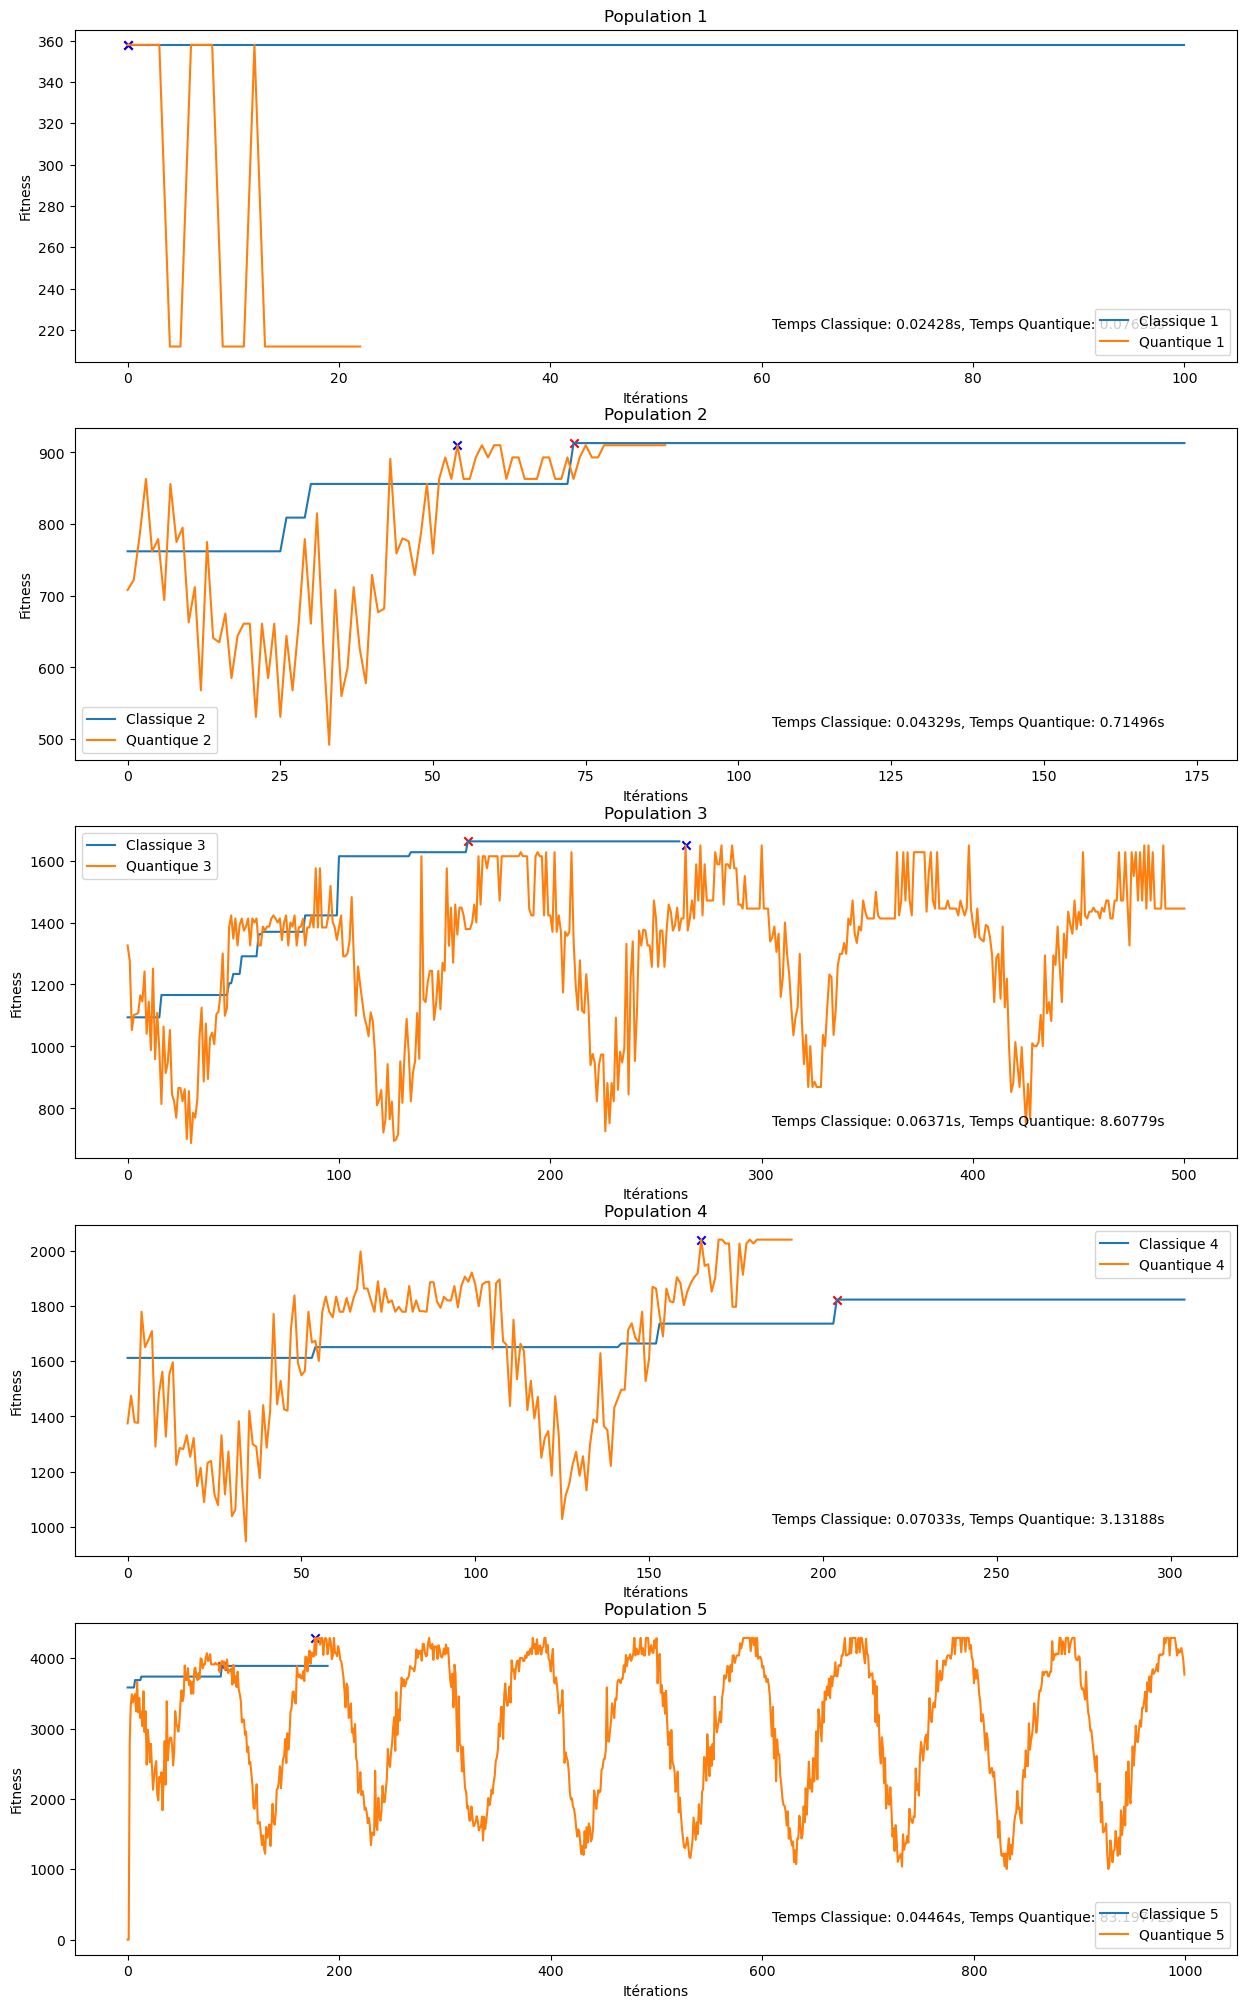

In [30]:
plt.figure(figsize=(15, 25))

# Sous-graphique 1
plt.subplot(5, 1, 1)
plt.plot(historique_fitness_classique_1, label="Classique 1")
plt.plot(historique_fitness_quantique_1, label="Quantique 1")
# Ajouter les croix
plt.scatter(premiere_classique_1, historique_fitness_classique_1[premiere_classique_1], c='red', marker='x')
plt.scatter(premiere_quantique_1, historique_fitness_quantique_1[premiere_quantique_1], c='blue', marker='x')
plt.text(x=0.6, y=0.1,
         s=f"Temps Classique: {round(temps_classique_1, 5)}s, Temps Quantique: {round(temps_quantique_1, 5)}s",
         fontsize=10, transform=plt.gca().transAxes)
plt.title("Population 1")
plt.xlabel("Itérations")
plt.ylabel("Fitness")
plt.legend()

# Sous-graphique 2
plt.subplot(5, 1, 2)
plt.plot(historique_fitness_classique_2, label="Classique 2")
plt.plot(historique_fitness_quantique_2, label="Quantique 2")
# Ajouter les croix
plt.scatter(premiere_classique_2, historique_fitness_classique_2[premiere_classique_2], c='red', marker='x')
plt.scatter(premiere_quantique_2, historique_fitness_quantique_2[premiere_quantique_2], c='blue', marker='x')
plt.text(x=0.6, y=0.1,
         s=f"Temps Classique: {round(temps_classique_2, 5)}s, Temps Quantique: {round(temps_quantique_2, 5)}s",
         fontsize=10, transform=plt.gca().transAxes)
plt.title("Population 2")
plt.xlabel("Itérations")
plt.ylabel("Fitness")
plt.legend()

# Sous-graphique 3
plt.subplot(5, 1, 3)
plt.plot(historique_fitness_classique_3, label="Classique 3")
plt.plot(historique_fitness_quantique_3, label="Quantique 3")
# Ajouter les croix
plt.scatter(premiere_classique_3, historique_fitness_classique_3[premiere_classique_3], c='red', marker='x')
plt.scatter(premiere_quantique_3, historique_fitness_quantique_3[premiere_quantique_3], c='blue', marker='x')
plt.text(x=0.6, y=0.1,
         s=f"Temps Classique: {round(temps_classique_3, 5)}s, Temps Quantique: {round(temps_quantique_3, 5)}s",
         fontsize=10, transform=plt.gca().transAxes)
plt.title("Population 3")
plt.xlabel("Itérations")
plt.ylabel("Fitness")
plt.legend()

# Sous-graphique 4
plt.subplot(5, 1, 4)
plt.plot(historique_fitness_classique_4, label="Classique 4")
plt.plot(historique_fitness_quantique_4, label="Quantique 4")
# Ajouter les croix
plt.scatter(premiere_classique_4, historique_fitness_classique_4[premiere_classique_4], c='red', marker='x')
plt.scatter(premiere_quantique_4, historique_fitness_quantique_4[premiere_quantique_4], c='blue', marker='x')
plt.text(x=0.6, y=0.1,
         s=f"Temps Classique: {round(temps_classique_4, 5)}s, Temps Quantique: {round(temps_quantique_4, 5)}s",
         fontsize=10, transform=plt.gca().transAxes)
plt.title("Population 4")
plt.xlabel("Itérations")
plt.ylabel("Fitness")
plt.legend()

# Sous-graphique 5
plt.subplot(5, 1, 5)
plt.plot(historique_fitness_classique_5, label="Classique 5")
plt.plot(historique_fitness_quantique_5, label="Quantique 5")
# Ajouter les croix
plt.scatter(premiere_classique_5, historique_fitness_classique_5[premiere_classique_5], c='red', marker='x')
plt.scatter(premiere_quantique_5, historique_fitness_quantique_5[premiere_quantique_5], c='blue', marker='x')
plt.text(x=0.6, y=0.1,
         s=f"Temps Classique: {round(temps_classique_5, 5)}s, Temps Quantique: {round(temps_quantique_5, 5)}s",
         fontsize=10, transform=plt.gca().transAxes)
plt.title("Population 5")
plt.xlabel("Itérations")
plt.ylabel("Fitness")
plt.legend()

plt.show()

# Conclusion

Nous pouvons voir que l'algorithme quantique est plus efficace que l'algorithme classique sur une majorité de populations. En effet, l'algorithme quantique converge plus rapidement en nombre d'itérations vers la solution optimale que l'algorithme classique, il trouve de meilleurs résultats comparés à l'algorithme classique. Cependant, l'algorithme quantique est plus long à exécuter que l'algorithme classique. Cela est dû au fait que l'algorithme quantique est plus complexe que l'algorithme classique. En effet, l'algorithme quantique utilise des qubits et des portes quantiques. De plus, l'algorithme quantique utilise des matrices et des vecteurs. Cela est plus complexe que l'algorithme classique qui utilise des tableaux et des boucles.